## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

# Nome: Rafael Cunha Bejes Learth

# NºUSP:13676367

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze4.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,0,0,32.0,51.467099
1,10,1,0,0,18.0,56.430551
2,16,0,0,0,24.0,68.442015
3,3,0,1,0,20.0,36.114753
4,27,0,0,0,52.0,64.221487
...,...,...,...,...,...,...
1595,1,0,1,0,18.0,20.829811
1596,21,1,0,0,29.0,56.559262
1597,9,0,1,1,29.0,61.302369
1598,12,1,0,0,48.0,53.128366


In [61]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [62]:
#Analise do df, verificando as quantidades de nsneeze, os primeiro 5 termos e a descrição de média, mínimos e quartis do df
print("Analise inicial do dataframe:")
print(df.head())
df.info()
print(df.describe())

Analise inicial do dataframe:
   nsneeze  alcohol  antihist  smoker   age     pollen
0        7        0         0       0  32.0  51.467099
1       10        1         0       0  18.0  56.430551
2       16        0         0       0  24.0  68.442015
3        3        0         1       0  20.0  36.114753
4       27        0         0       0  52.0  64.221487
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1600 non-null   int64  
 1   alcohol   1600 non-null   int64  
 2   antihist  1600 non-null   int64  
 3   smoker    1600 non-null   int64  
 4   age       1600 non-null   float64
 5   pollen    1600 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 75.1 KB
           nsneeze      alcohol     antihist       smoker          age  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean     44.586875     

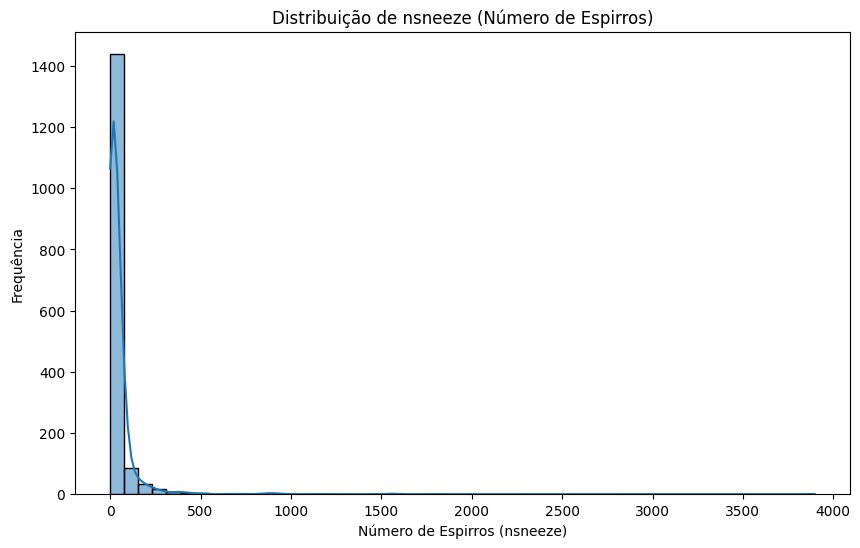


Estatísticas Descritivas para 'nsneeze':
count    1600.000000
mean       44.586875
std       143.814421
min         0.000000
25%         9.000000
50%        18.000000
75%        38.000000
max      3897.000000
Name: nsneeze, dtype: float64
Mediana: 18.0


In [63]:
# Analise a distribuição da variável 'nsneeze' usando histograma e calculo de suas estatísticas descritivas básicas
plt.figure(figsize=(10, 6))
sns.histplot(df['nsneeze'], kde=True, bins=50)
plt.title('Distribuição de nsneeze (Número de Espirros)')
plt.xlabel('Número de Espirros (nsneeze)')
plt.ylabel('Frequência')
plt.show()

print("\nEstatísticas Descritivas para 'nsneeze':")
print(df['nsneeze'].describe())
print(f"Mediana: {df['nsneeze'].median()}")


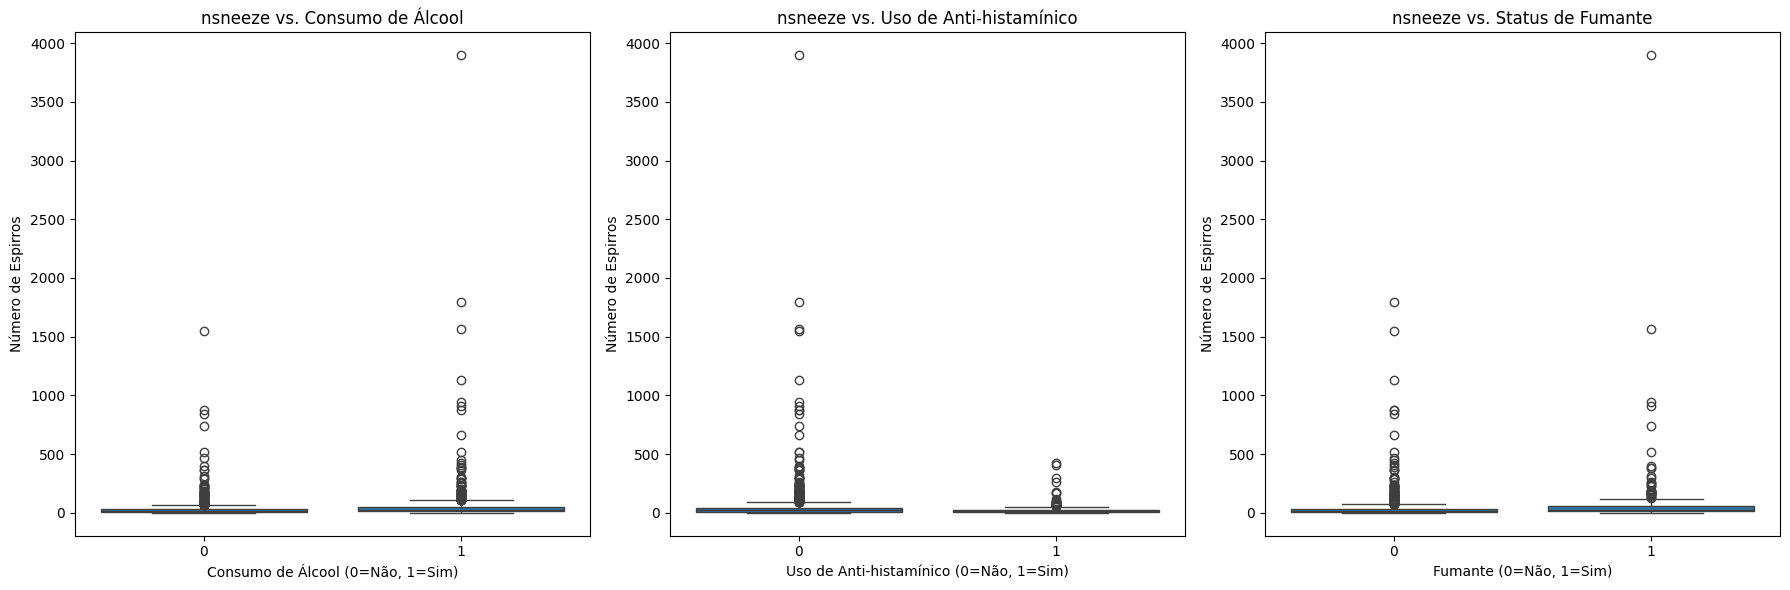

In [64]:
#Visualização da relação entre nsneeze e as variáveis categóricas (alcohol, antihist, smoker)
#usando boxplots, para observar as diferenças do nsneeze entre as categorias.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='alcohol', y='nsneeze', data=df, ax=axes[0])
axes[0].set_title('nsneeze vs. Consumo de Álcool')
axes[0].set_xlabel('Consumo de Álcool (0=Não, 1=Sim)')
axes[0].set_ylabel('Número de Espirros')

sns.boxplot(x='antihist', y='nsneeze', data=df, ax=axes[1])
axes[1].set_title('nsneeze vs. Uso de Anti-histamínico')
axes[1].set_xlabel('Uso de Anti-histamínico (0=Não, 1=Sim)')
axes[1].set_ylabel('Número de Espirros')

sns.boxplot(x='smoker', y='nsneeze', data=df, ax=axes[2])
axes[2].set_title('nsneeze vs. Status de Fumante')
axes[2].set_xlabel('Fumante (0=Não, 1=Sim)')
axes[2].set_ylabel('Número de Espirros')

plt.tight_layout()
plt.show()

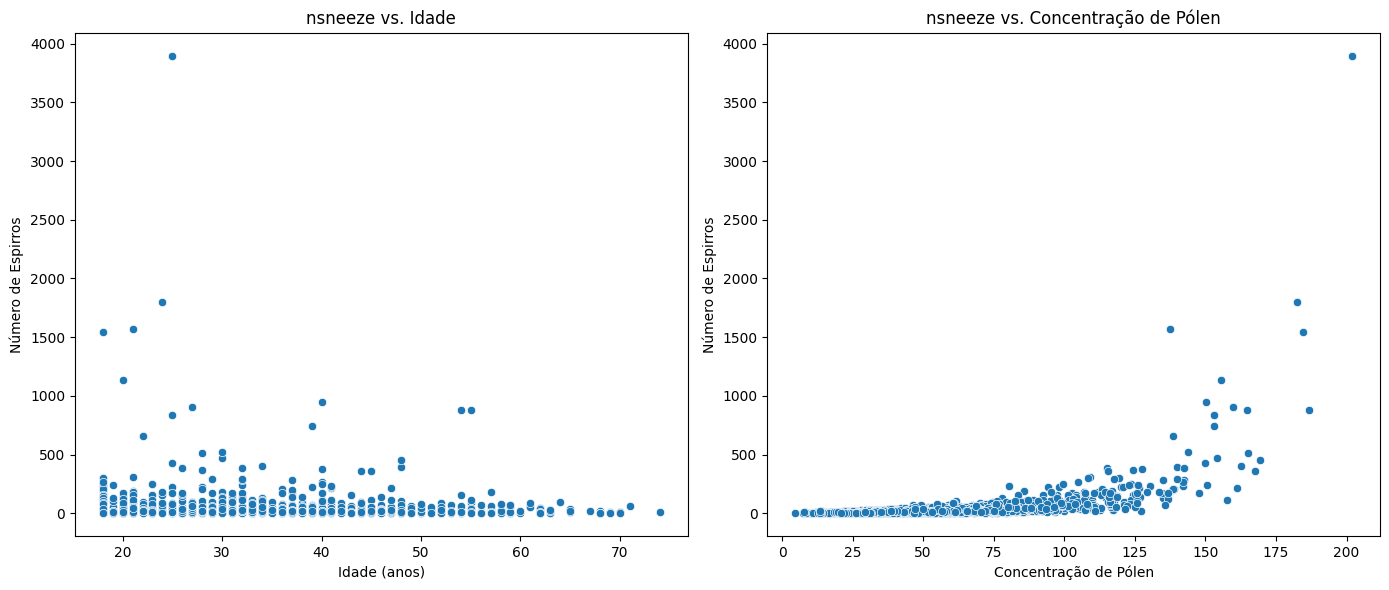


Correlação entre nsneeze e Age: -0.03812311495636514
Correlação entre nsneeze e Pollen: 0.5112404092049702


In [65]:
#Para analisar a relação entre nsneeze e as variáveis contínuas (age, pollen),
#utilizou-se gráficos de dispersão (scatter plots) para visualizar suas distribuições
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='age', y='nsneeze', data=df, ax=axes[0])
axes[0].set_title('nsneeze vs. Idade')
axes[0].set_xlabel('Idade (anos)')
axes[0].set_ylabel('Número de Espirros')

sns.scatterplot(x='pollen', y='nsneeze', data=df, ax=axes[1])
axes[1].set_title('nsneeze vs. Concentração de Pólen')
axes[1].set_xlabel('Concentração de Pólen')
axes[1].set_ylabel('Número de Espirros')


plt.tight_layout()
plt.show()

#calculou-se os coeficientes de correlação de Pearson para quantificar a intensidade e a direção de suas relações lineares.

print("\nCorrelação entre nsneeze e Age:", df['nsneeze'].corr(df['age']))
print("Correlação entre nsneeze e Pollen:", df['nsneeze'].corr(df['pollen']))


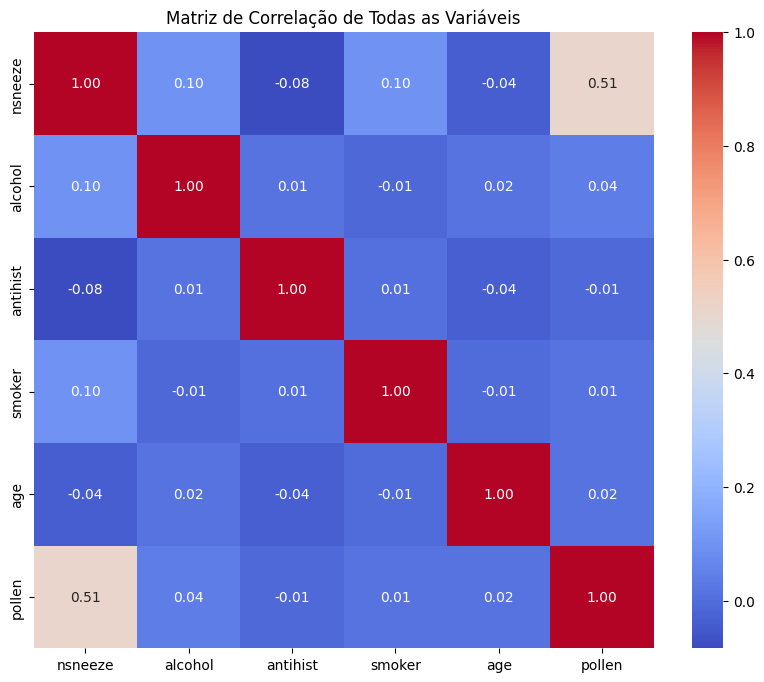

In [66]:
#visualização usando um heatmap para análise geral de correlação entre todas as variáveis, a fim de compreender melhor como elas se relacionam
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Todas as Variáveis')
plt.show()

## Análise :

O conjunto de dados possui 1600 linhas e 6 colunas, sem valores ausentes. As colunas são:

-nsneeze (número de espirros);

-alcohol, antihist, smoker (variáveis categóricas binárias);

-age e pollen (variáveis contínuas).

Distribuição de nsneeze: O número de espirros varia de 0 a 3897, com média de 44,59 e mediana de 18,00. A distribuição é fortemente assimétrica à direita, indicada pela diferença relevante entre média e mediana, e por um desvio padrão de 143,81, sugerindo a presença de valores altos ou outliers.

Relação dos Preditores Categóricos com nsneeze: Foram gerados boxplots de nsneeze em função de alcohol, antihist e smoker. Essas visualizações sugerem possíveis diferenças nas contagens de nsneeze entre as categorias dessas variáveis, embora a extensão dessas diferenças exija testes estatísticos adicionais.

Relação dos Preditores Contínuos com nsneeze:

Age: Há uma relação linear negativa muito fraca entre nsneeze e age, com coeficiente de correlação de aproximadamente -0,038.

Pollen: Há uma relação linear positiva moderada entre nsneeze e a concentração de pollen, com coeficiente de correlação de aproximadamente 0,511. Isso indica que, à medida que os níveis de pólen aumentam, o número de espirros tende a aumentar.

Análise Geral de Correlação: Um mapa de calor das correlações entre todas as variáveis mostrou que pollen tem a correlação positiva mais forte com nsneeze (0,51). As demais variáveis preditoras apresentam, em geral, correlações fracas com nsneeze


**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [67]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [68]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11346.
Date:                Mon, 01 Dec 2025   Deviance:                       15064.
Time:                        20:39:49   Pearson chi2:                 1.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5002      0.015  

## Análise:
Todos os coeficientes são estatisticamente significativos p < 0,001, indicando que cada variável contribui de forma relevante para o número de espirros.

Intercepto (1.50): número base de espirros para o indivíduo de referência (≈ 4,5 espirros).

Álcool (+0.44): aumenta os espirros em ≈ 56%, mostrando efeito irritante associado ao consumo.

Antihistamínico (–0.61): reduz os espirros em ≈ 46%, como esperado pelo efeito farmacológico.

Fumante (+0.43): aumenta os espirros em ≈ 53%, indicando irritação adicional das vias respiratórias.

Idade (–0.0127 por ano): cada ano reduz os espirros em ≈ 1,3%, com pessoas mais velhas espirrando menos.

Pólen (+0.0314 por unidade): cada unidade de pólen aumenta os espirros em ≈ 3,2%, consistente com reações alérgicas.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [69]:
#Método pelo Qui-Quadrado de Pearson
pearson_chi2 = ajuste_pois.pearson_chi2
df_residual = ajuste_pois.df_resid
dispersion_pearson = pearson_chi2 / df_residual

print(f"Qui-Quadrado de Pearson: {pearson_chi2:.2f}")
print(f"Graus de Liberdade: {df_residual}")
print(f"Parâmetro de Dispersão (Qui-Quadrado de Pearson / DF): {dispersion_pearson:.2f}")

Qui-Quadrado de Pearson: 15915.95
Graus de Liberdade: 1594
Parâmetro de Dispersão (Qui-Quadrado de Pearson / DF): 9.98


In [70]:
#Método pela Deviance
deviance = ajuste_pois.deviance
dispersion_deviance = deviance / df_residual

print(f"Resíduo da Deviance: {deviance:.2f}")
print(f"Graus de Liberdade: {df_residual}")
print(f"Parâmetro de Dispersão (Deviance / DF): {dispersion_deviance:.2f}")

Resíduo da Deviance: 15063.68
Graus de Liberdade: 1594
Parâmetro de Dispersão (Deviance / DF): 9.45


In [71]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

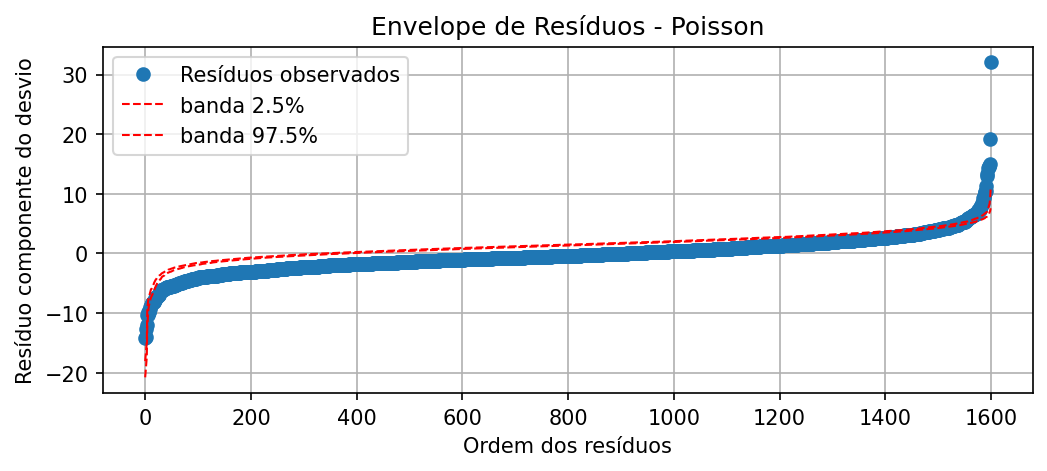

In [72]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

## Análise:
Os valores de dispersão (~9,98 e ~9,45) são muito maiores que 1, o que indica forte overdispersão.
Isso significa que o modelo de Poisson não está adequado aos dados, pois subestima a variabilidade.
Isso também é perceptível pelo gráfico, em que os resíduos observados não seguem a banda


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6055.7
Date:                Mon, 01 Dec 2025   Deviance:                       1785.6
Time:                        20:39:50   Pearson chi2:                 1.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9981
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4703      0.047  


--- Sumário do Modelo Binomial Negativo ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6055.7
Date:                Mon, 01 Dec 2025   Deviance:                       1785.6
Time:                        20:39:50   Pearson chi2:                 1.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9981
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

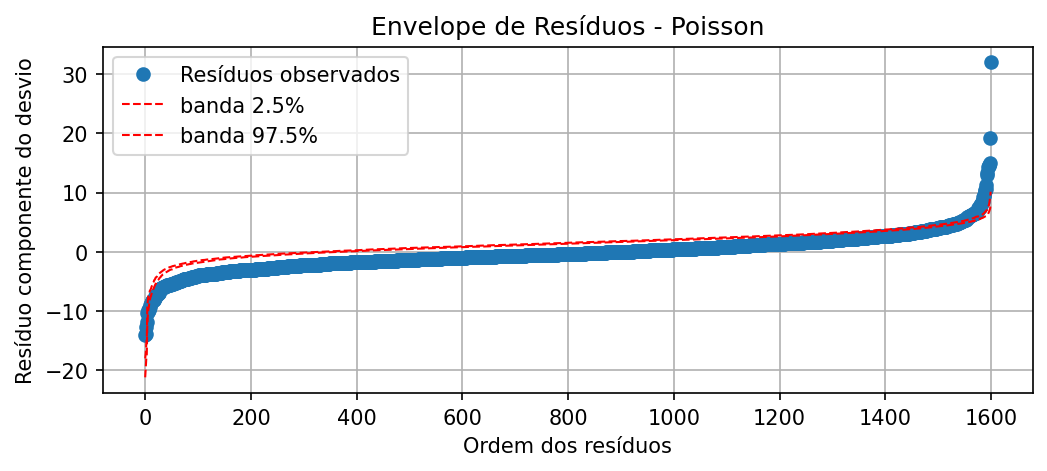

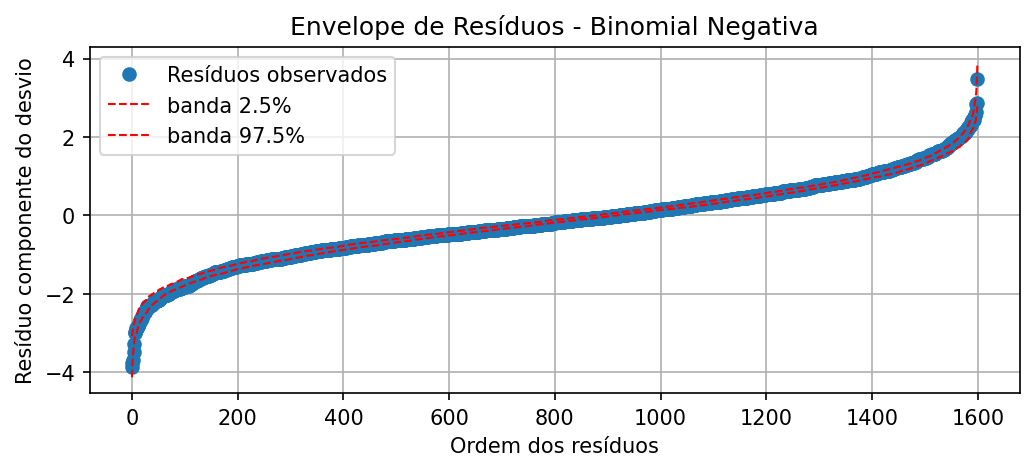

In [74]:


# Verificação do valor de alpha para o Modelo Binomial Negativo
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print("\n--- Sumário do Modelo Binomial Negativo ---")
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo (fixado):", alpha_usado)

# Comparação com o Modelo Poisson
modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)
ajuste_pois = modelo_pois.fit()

print("\n--- Comparação de Modelos (Deviance e AIC) ---")
print(f"Modelo Poisson - Deviance: {ajuste_pois.deviance:.2f}, AIC: {ajuste_pois.aic:.2f}")
print(f"Modelo Binomial Negativo - Deviance: {ajuste_nb.deviance:.2f}, AIC: {ajuste_nb.aic:.2f}")

print("\n--- Gráficos de Resíduos Componentes do Desvio ---")

# Funções gráficas
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


# Para o modelo Poisson
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(ajuste_pois, preditoras, "Envelope de Resíduos - Poisson")
plt.show()

# Para o modelo Binomial Negativo
plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(ajuste_nb, "Envelope de Resíduos - Binomial Negativa")
plt.show()

# Análise:
O modelo Poisson:

- apresenta superdispersão severa (φ ≈ 9–10), alta deviance e resíduos inadequados.


O modelo Binomial Negativo:

- reduz drasticamente a deviance,

- apresenta AIC muito inferior,

- produz resíduos bem comportados(como pode ser visto no gráfico comparativo),

- acomoda corretamente a variância extra da contagem.

Portanto, o modelo Binomial Negativo é o mais adequado para descrever o número de espirros, conforme sugerem todas as métricas (deviance, AIC) e os diagnósticos gráficos.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [75]:
print("\n--- Efeito Médio Marginal para 'alcohol' e 'antihist' (Modelo Binomial Negativo) ---")

# Calcular os efeitos marginais médios (AMEs)
margeff = ajuste_nb.get_margeff(at='overall', method='dydx')

print(margeff.summary())

# Interpretação específica para 'alcohol' e 'antihist'
# As variáveis categóricas C(alcohol)[T.1] e C(antihist)[T.1] são as primeiras na tabela de resumo.
# Verificando a ordem na saída: C(alcohol)[T.1] é o primeiro (índice 0) e C(antihist)[T.1] é o segundo (índice 1)

alcohol_margeff = margeff.margeff[0] # C(alcohol)[T.1]
antihist_margeff = margeff.margeff[1] # C(antihist)[T.1]

print(f"\nInterpretação do Efeito Médio Marginal:")
print(f"  - Alcohol (C(alcohol)[T.1]):  {alcohol_margeff:.3f} ")
print(f"  - Antihistamine (C(antihist)[T.1]): {antihist_margeff:.3f} ")




--- Efeito Médio Marginal para 'alcohol' e 'antihist' (Modelo Binomial Negativo) ---
         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]     18.6652      1.249     14.949      0.000      16.218      21.112
C(antihist)[T.1]   -23.0131      1.490    -15.448      0.000     -25.933     -20.093
C(smoker)[T.1]      22.1822      1.535     14.455      0.000      19.174      25.190
age                 -0.4666      0.049     -9.611      0.000      -0.562      -0.371
pollen               1.3291      0.046     28.849      0.000       1.239       1.419

Interpretação do Efeito Médio Marginal:
  - Alcohol (C(alcohol)[T.1]):  18.665 
  - Antihistamine (C(antihist)[T.1]): -23.013 


# Análise:
O consumo de álcool aumenta cerca de 19 espirros no número esperado, enquanto o uso de anti-histamínico reduz aproximadamente 23 espirros. Ambos os efeitos são fortes e estatisticamente significativos.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


#1) Faz-se a separação das variáveis preditoras e a variável resposta
X = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]
y = df['nsneeze']

#2)Faz-se a separação dos dados em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3) Reconstruir os dataframes de treino e teste para uso com smf.glm
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

#4)Ajuste do Modelo Poisson no conjunto de treinamento ---
modelo_pois_train = smf.glm(
    formula=formula,
    data=df_train,
    family=sm.families.Poisson()
)
ajuste_pois_train = modelo_pois_train.fit()
print("\n--- Resumo do Modelo Poisson (Treinamento) ---")
print(ajuste_pois_train.summary())

# 5)Ajuste do Modelo Binomial Negativo no conjunto de treinamento ---
alpha_fixado = 0.2
modelo_nb_train = smf.glm(
    formula=formula,
    data=df_train,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)
ajuste_nb_train = modelo_nb_train.fit()
print("\n--- Resumo do Modelo Binomial Negativo (Treinamento) ---")
print(ajuste_nb_train.summary())

# 6)Predições no conjunto de teste e cálculo das métricas

# 6.1)Predições do modelo Poisson
predictions_pois = ajuste_pois_train.predict(X_test)

# 6.1.1)Garantir que as predições sejam não-negativas e inteiros para contagens
predictions_pois_clipped = np.maximum(0, predictions_pois)

eqm_pois = mean_squared_error(y_test, predictions_pois_clipped)
eam_pois = mean_absolute_error(y_test, predictions_pois_clipped)

print(f"\n--- Métricas de Desempenho no Conjunto de Teste (Modelo Poisson) ---")
print(f"Erro Quadrático Médio (EQM): {eqm_pois:.2f}")
print(f"Erro Absoluto Médio (EAM): {eam_pois:.2f}")

# 6.2)Predições do modelo Binomial Negativo
predictions_nb = ajuste_nb_train.predict(X_test)

# 6.2.1)Garantir que as predições sejam não-negativas e inteiros para contagens, assim como foi feito pro poisson
predictions_nb_clipped = np.maximum(0, predictions_nb)

eqm_nb = mean_squared_error(y_test, predictions_nb_clipped)
eam_nb = mean_absolute_error(y_test, predictions_nb_clipped)

print(f"\n--- Métricas de Desempenho no Conjunto de Teste (Modelo Binomial Negativo) ---")
print(f"Erro Quadrático Médio (EQM): {eqm_nb:.2f}")
print(f"Erro Absoluto Médio (EAM): {eam_nb:.2f}")

print("\n--- Comparação Final ---")
print(f"Modelo Poisson: EQM = {eqm_pois:.2f}, EAM = {eam_pois:.2f}")
print(f"Modelo Binomial Negativo: EQM = {eqm_nb:.2f}, EAM = {eam_nb:.2f}")



--- Resumo do Modelo Poisson (Treinamento) ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1280
Model:                            GLM   Df Residuals:                     1274
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9250.6
Date:                Mon, 01 Dec 2025   Deviance:                       12402.
Time:                        20:39:51   Pearson chi2:                 1.32e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

# Análise:
## Comparação entre EQM e EAM

O modelo Poisson apresenta valores menores de EQM (1370,55) e EAM (14,71) do que o modelo Binomial Negativo (EQM = 1942,37; EAM = 15,21).Portanto, o Poisson tem melhor desempenho preditivo fora da amostra, produzindo erros médios menores nas previsões.

## Convergência ou divergência com os critérios de ajuste

Os critérios de ajuste dentro da amostra (deviance e AIC) apontam o modelo Binomial Negativo como muito superior:

Deviance: 15063 (Poisson) vs. 1786 (BN)

AIC: 22704 (Poisson) vs. 12123 (BN)


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [77]:
import pandas as pd
import numpy as np


# 1)define-se os valores de pólen para baixa e alta concentração usando os quartis da variável 'pollen'
low_pollen = df['pollen'].quantile(0.25)
high_pollen = df['pollen'].quantile(0.75)

print(f"Valor de pólen para baixa concentração (1º quartil): {low_pollen:.2f}")
print(f"Valor de pólen para alta concentração (3º quartil): {high_pollen:.2f}")

# 2) cria-se DataFrames para os perfis dos indivíduos
individuo_A = pd.DataFrame({
    'alcohol': [0],
    'antihist': [1],
    'smoker': [0],
    'age': [30],
    'pollen': [low_pollen]
})

individuo_B = pd.DataFrame({
    'alcohol': [1],
    'antihist': [0],
    'smoker': [1],
    'age': [50],
    'pollen': [high_pollen]
})

# 3) faz previsões usando o modelo Binomial Negativo
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=0.2)
)
ajuste_nb = modelo_nb.fit()

prediction_A = ajuste_nb.predict(individuo_A)
prediction_B = ajuste_nb.predict(individuo_B)

print("\n--- Previsões do Número Esperado de Espirros (Modelo Binomial Negativo) ---")
print(f"Indivíduo A (alcohol=0, antihist=1, smoker=0, age=30, pollen={low_pollen:.2f}):")
print(f"  Número esperado de espirros: {prediction_A.iloc[0]:.2f}")

print(f"Indivíduo B (alcohol=1, antihist=0, smoker=1, age=50, pollen={high_pollen:.2f}):")
print(f"  Número esperado de espirros: {prediction_B.iloc[0]:.2f}")


Valor de pólen para baixa concentração (1º quartil): 37.33
Valor de pólen para alta concentração (3º quartil): 74.70

--- Previsões do Número Esperado de Espirros (Modelo Binomial Negativo) ---
Indivíduo A (alcohol=0, antihist=1, smoker=0, age=30, pollen=37.33):
  Número esperado de espirros: 5.81
Indivíduo B (alcohol=1, antihist=0, smoker=1, age=50, pollen=74.70):
  Número esperado de espirros: 63.97


# Análise:
Para o Indivíduo A, que usa anti-histamínico, não consome álcool, não fuma, é relativamente jovem e está exposto a baixo nível de pólen, o número esperado de espirros é aproximadamente 5,8. Esse valor é consistente com um cenário de baixa irritação alérgica e presença de medicação que reduz sintomas.

Já o Indivíduo B, que consome álcool, é fumante, não utiliza anti-histamínico, tem idade mais elevada e está exposto a alta concentração de pólen, apresenta um número esperado muito maior, cerca de 64 espirros. Esse resultado reflete a combinação de fatores agravantes — álcool, tabagismo e pólen elevado — somados à ausência de tratamento anti-histamínico, todos associados a aumento substancial dos sintomas.